**Self Practice Exercises**

1. Load property dataset
2. Which type of hdb has the most entries in the dataset?
3. Display the total property_tax_collection for each financial year.
4. Generate the histogram charts.
5. Create a heatmap from sns for the function corr() on property dataset. Which is the most correlated pair of attributes?
6. Try sns.pairplot on property data.
7. Create 3 bins on no_of_cases (small : 0 to 10000, medium : 10001-100000, large : 100001-500000).
8. Generate the barchart on the newly created bins.
9. For each bin, display the average for the collected property tax.

In [1]:
import pandas as pd
import numpy as np
# Import some libraries that allow us to perform visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1) Load the data in the given file - property.csv.**

In [2]:
property = pd.read_csv("property.csv")
property.head()

,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection
0,2010,1 or 2 Room,8632,4500,190
1,2010,3 Room,213865,6300,16259
2,2010,4 Room,339721,8100,45089
3,2010,5 Room,209210,9000,37936
4,2010,Executive & Others,64613,9300,13046


**2) Which type of hdb has the most entries in the dataset?**

In [3]:
property["type_of_hdb"].describe()

count              40
unique              5
top       1 or 2 Room
freq                8
Name: type_of_hdb, dtype: object

In [4]:
property["type_of_hdb"].value_counts()

type_of_hdb
1 or 2 Room           8
3 Room                8
4 Room                8
5 Room                8
Executive & Others    8
Name: count, dtype: int64

**3) Display the total property_tax_collection for each financial year.**

In [5]:
property.groupby("financial_year")["property_tax_collection"].sum()

financial_year
2010    112520
2011    104543
2012    144415
2013    150158
2014    140286
2015    134257
2016    122876
2017    117947
Name: property_tax_collection, dtype: int64

**4) Generate the histogram charts.**

array([[<Axes: title={'center': 'financial_year'}>,
        <Axes: title={'center': 'no_of_cases'}>],
       [<Axes: title={'center': 'median_annual_value'}>,
        <Axes: title={'center': 'property_tax_collection'}>]],
      dtype=object)

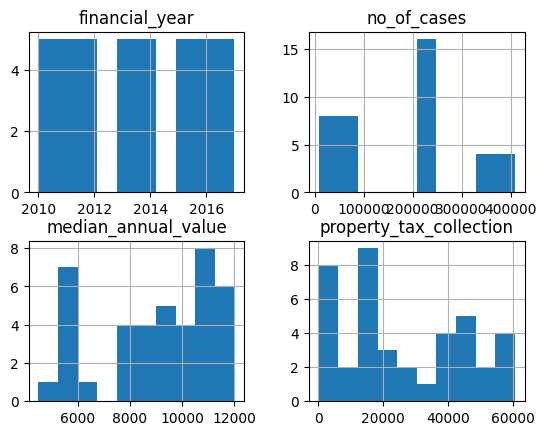

In [6]:
property.hist()

**5) Create a heatmap from sns for the function corr() on property dataset. Which is the most correlated pair of attributes?**


<Axes: >

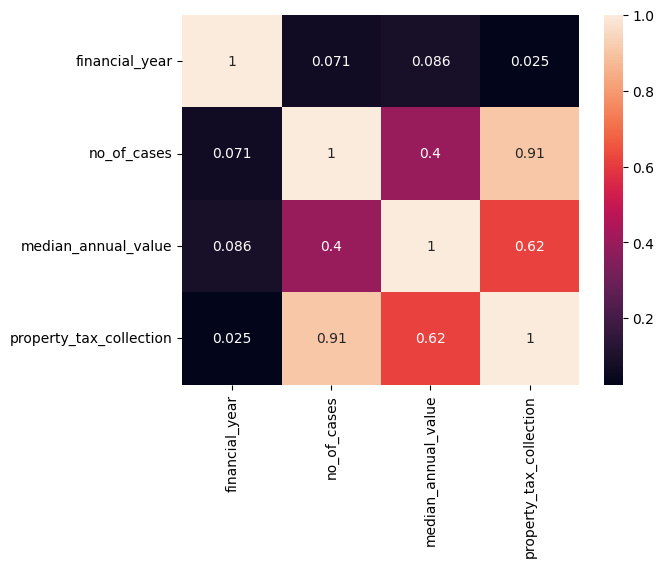

In [7]:
# creates heatmap using numerical values only, adding annotations
# no_of_cases vs property_tax_collection strongest correlation of 0.91
sns.heatmap(property.corr(numeric_only=True), annot=True)

**6) Try sns.pairplot on property**

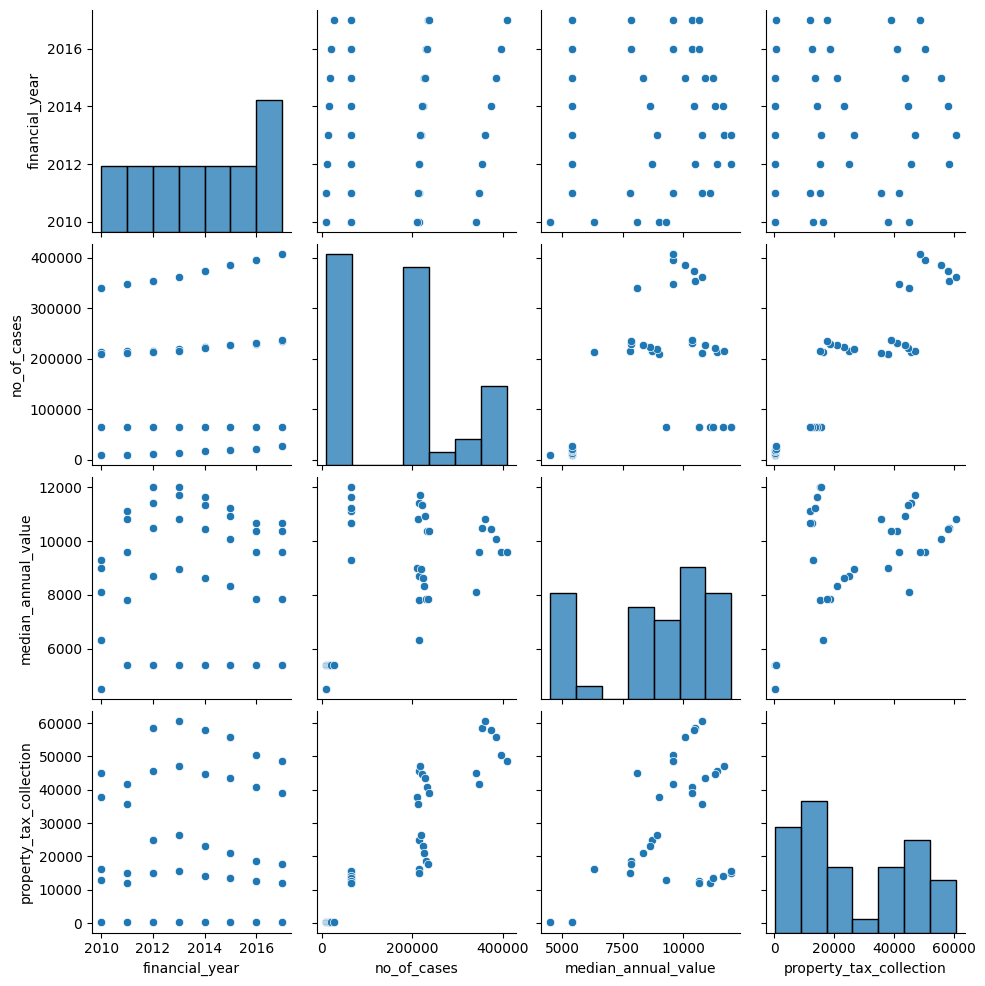

In [8]:
sns.pairplot(property)

**7) Create 3 bins on no_of_cases (small : 0 to 10000, medium : 10001-100000, large : 100001-500000).**

In [9]:
property["type_of_cases"] = pd.cut(property["no_of_cases"], bins = [0, 10000, 100000, 500000], labels = ["small", "medium", "large"])
property.head()

,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection,type_of_cases
0,2010,1 or 2 Room,8632,4500,190,small
1,2010,3 Room,213865,6300,16259,large
2,2010,4 Room,339721,8100,45089,large
3,2010,5 Room,209210,9000,37936,large
4,2010,Executive & Others,64613,9300,13046,medium


**8) Generate the column chart on the newly created bins.**

<Axes: xlabel='type_of_cases', ylabel='count'>

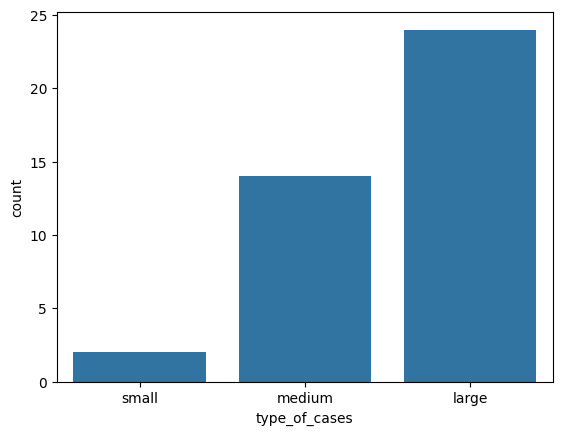

In [10]:
sns.countplot(property, x = "type_of_cases")

**9) For each bin, display the average for the collected property tax.**

In [13]:
property.groupby("type_of_cases")["property_tax_collection"].mean()

C:\Users\sbgka\AppData\Local\Temp\ipykernel_8592\1972217664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property.groupby("type_of_cases")["property_tax_collection"].mean()


type_of_cases
small       216.000000
medium     7883.785714
large     38174.875000
Name: property_tax_collection, dtype: float64